# Config
Determine the preliminary parameters to determine wealth disimbursement

##Primary Parameters

In [2]:
#The amount of money to start with (in millions)
principle_amount = 1000

#the age of the primary account holder (person who creates the fund) is when they activate the fund. (Decides if the primary account holder already has kids)
starting_age = 65

#the % rate at which the capital portfolio grows
growth_rate = 6 #8.93% is the historical average of the s&p500 since it was created in 1993

#the amount payed out yearly to each decendant (in millions). (In today's dollar. This adjusts with inflation)
yearly_payment = 1

#the age at which each decendant starts receiving payments
min_age = 30

#the age at which each decendant stops receiving payments
max_age = 75

##Secondary Parameters

In [3]:
#The first generation of decendants that receive disimbursement payments. 
start_paying_gen = 1 #note Gen 0 is the primary account holder, 1 is kids, 2 is grandkids, etc

#the avg number of kids each decendant will have
avg_num_kids = 3

#the avg age at which each decendant has kids
avg_age_of_kids = 28

#the avg life expectancy. In canada, it is 82 years
life_expectancy = 82

#the avg % inflation. 
inflation = 2.5

#Main Code

In [4]:
def updateGenerations(currentYear):
  global numDecendants
  tempDict = {}

  #update generations
  for yearBorn in peopleDict:
    age = currentYear - yearBorn

    if age <= life_expectancy:
      #copy over remaining living generations to tempDict
      tempDict[yearBorn] = peopleDict[yearBorn]
    
    else:
        numDecendants += peopleDict[yearBorn] #when accounting for dying people, add them to the count of decendants

    #people are born
    if age == avg_age_of_kids:
      tempDict[currentYear] = avg_num_kids * peopleDict[yearBorn] #create new generation

  #write tempDict to peopleDict
  peopleDict.clear()
  for yearBorn in tempDict:
    peopleDict[yearBorn] = tempDict[yearBorn]

def getPayment(currentYear):
    global peopleSupported

    #check who gets paid
    payment = 0

    supported = 0 #a counter used to keep track of how many people are supported currently
    for yearBorn in peopleDict:
        if yearBorn < (avg_age_of_kids * start_paying_gen): #if you design the fund to start paying the first generation, you'll need to be born in the year 1*avg_age_of_kids or later to get money
            continue

        age = currentYear - yearBorn

        #if they are within the eligable age category
        if (age >= min_age) and (age < max_age):
            payment += yearly_payment * peopleDict[yearBorn]
            supported += peopleDict[yearBorn]
        

    peopleSupported = supported
    return payment


The fund lasted 262 years!
The fund has supported a total 29524 people, and ended while supporting 8748 people.


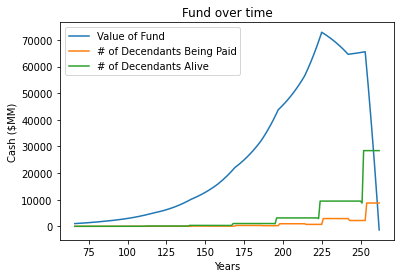

In [5]:
#Install Packages
import math
from os import closerange
import matplotlib.pyplot as plt
from collections import OrderedDict 

#setup maths
netRate = ((growth_rate-inflation) / 100) +1
cash = principle_amount
timeline = 0
peopleDict = OrderedDict()
peopleDict[0] = 1 #   year: num of descendants being paid (excluding spouses)
peopleSupported = 0
numDecendants = 0

#account for pre-existing family
if starting_age >= avg_age_of_kids:
    #create kids
    timeline = avg_age_of_kids
    peopleDict[timeline] = avg_num_kids

if starting_age >= avg_age_of_kids * 2:
    #create grandkids
    timeline = avg_age_of_kids * 2
    peopleDict[timeline] = avg_num_kids * peopleDict[timeline - avg_age_of_kids]

if starting_age >= avg_age_of_kids * 3:
    #create great grandkids
    timeline = avg_age_of_kids * 3
    peopleDict[timeline] = avg_num_kids * peopleDict[timeline - avg_age_of_kids]

if starting_age >= avg_age_of_kids * 4:
    #create great great grandkids
    timeline = avg_age_of_kids * 4
    peopleDict[timeline] = avg_num_kids * peopleDict[timeline - avg_age_of_kids]

timeline = starting_age



#graph setup
cashTracker = []
peopleTracker = []
paidTracker = []
yearTracker = []


print("")
while cash > 0:
  timeline += 1
  cash = cash * netRate #compound dat cash, correct for inflation

  updateGenerations(timeline) #adjust for new people / people dying
  cash = cash - getPayment(timeline)
  
  cashTracker.append(cash) #log the current value of cash
  peopleTracker.append(sum(peopleDict.values())) #log the number of decendants
  paidTracker.append(peopleSupported)
  yearTracker.append(timeline) #log the current year

  if (timeline == 10000) or (cash >= 1E300):
      print("Congratulations! You, and all {} of your decendants have beat capitalism!".format(numDecendants + peopleTracker[-1]))
      print("After {} years, the fund was worth {} dollars!".format(timeline, cash))
      print("For reference: 1 billion is 1e45, 1 trillion is 1e48, and 1 quadrillion is 1e51.")
      break


#print results
if timeline != 10000:
    print("The fund lasted {} years!".format(timeline))
    print("The fund has supported a total {} people, and ended while supporting {} people.".format(numDecendants + peopleTracker[-1], paidTracker[-1]))


plt.plot(yearTracker, cashTracker, label="Value of Fund")
plt.plot(yearTracker, paidTracker, label="# of Decendants Being Paid")
plt.plot(yearTracker, peopleTracker, label="# of Decendants Alive")
plt.plot()
plt.xlabel("Years")
plt.ylabel("Cash ($MM)")
plt.title("Fund over time")
plt.legend()
plt.show()